In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [2]:
train_data=pd.read_excel("s.xlsx",index_col=0)

In [3]:
test_data=pd.read_excel("r.xlsx",index_col=0)#train_data--->data                             #test_data--->X_tes

In [4]:
data_dictionary=pd.read_excel("data.xlsx")

In [5]:
print(train_data.shape,test_data.shape,data_dictionary.shape)

(300000, 37) (300000, 36) (38, 2)


In [6]:
data_dictionary.head(10)

,Feature,Description
0,cust_id,Customer Account ID
1,var1,Account Tenure (Days for which customer has be...
2,var2,Number of temporary account disconnects in las...
3,var3,Wireless equipments owned by customer (value c...
4,var4,Number of times internet connect status = 1 (i...
5,var5,No. of Voice related tickets (in last one year)
6,var6,Index of social position based on neighborhood...
7,var7,Count of emails opened (in last 60 Days) where...
8,var8,Number of free On-demand video watched by cust...
9,var9,Median home value in the area of housing unit(...


In [7]:
train_data.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
100001,2667,0,0,1768,0,4,0,2,291016,0,...,0,other,Inactive,Standard,Video/Internet/Voice,N,NaN,Single Housing,N,Desktop
100002,435,0,0,515,0,3,0,0,137667,0,...,0,other,Never,Standard,Video/Internet,N,NaN,Single Housing,N,Desktop
100003,1520,0,0,2280,0,6,0,4,301567,0,...,0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
100004,4393,0,1,5731,0,8,1,27,436735,1,...,1,other,Active,Standard,Internet Only,NaN,NaN,Single Housing,N,Desktop
100005,3587,0,0,2493,0,7,0,7,314970,0,...,0,movie_channel1,Never,Standard,Internet Only,N,NaN,Multi Housing,N,STB


In [8]:
train_data.sample(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
374686,1409,0,0,1439,0,5,0,5,262596,0,...,0,other,Never,Standard,Video/Internet/Voice,N,Agent,Single Housing,N,Mobile App
103800,2261,0,0,1667,0,5,0,5,248551,0,...,0,other,Never,CreditCard,Video/Internet/Voice,N,NaN,Multi Housing,N,Desktop
376301,1186,0,1,2823,0,5,0,0,229470,0,...,0,other,Cancelled,Standard,Internet/Voice,N,NaN,Single Housing,N,Desktop
100378,1762,0,0,2226,0,5,0,0,294440,0,...,0,other,Pending,Standard,Video/Internet,N,NaN,Multi Housing,N,Desktop
290152,121,0,0,56,0,0,0,0,70125,0,...,0,news_channel2,Never,Standard,Internet Only,N,NaN,Single Housing,N,Desktop


In [9]:
test_data.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
cust_id,,,,,,,,,,,,,,,,,,,,,
400001,2871,0,0,1925,0,7,0,1,238388,0,...,0,0,other,Pending,Standard,Video/Internet/Voice,N,NaN,Single Housing,N
400002,562,0,0,197,0,3,0,0,136782,0,...,0,0,other,Inactive,Standard,Internet Only,N,Other,Single Housing,N
400003,4350,0,1,5664,0,8,1,25,336602,3,...,0,1,other,Inactive,Standard,Video/Internet,N,NaN,Single Housing,N
400004,7580,0,1,6093,0,8,4,31,501694,1,...,0,1,other,Active,Standard,Internet Only,N,NaN,Single Housing,N
400005,58,0,0,53,0,0,0,0,87465,0,...,0,0,other,Active,Standard,Video/Internet,N,NaN,Single Housing,N


In [10]:
test_data.sample(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
cust_id,,,,,,,,,,,,,,,,,,,,,
566211,574,0,0,345,0,1,0,0,154297,0,...,0,0,other,Never,Standard,Video/Internet/Voice,N,NaN,Single Housing,N
646492,3165,0,0,2971,0,7,0,5,335295,0,...,0,0,other,Pending,Standard,Internet Only,N,NaN,Single Housing,N
412042,2293,0,1,9219,0,8,0,37,402169,3,...,0,1,other,Pending,Standard,Internet Only,NaN,NaN,Single Housing,Y
633209,3576,0,0,2760,0,7,0,6,308252,0,...,0,0,other,Pending,Standard,Video/Internet/Voice,N,NaN,Single Housing,N
419791,251,0,0,79,0,1,0,0,95509,0,...,0,0,other,Never,Standard,Video/Internet,N,NaN,Single Housing,N


In [11]:
train_data.columns

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var21',
       'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29',
       'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37',
       'var38', 'var39', 'var40', 'self_service_platform'],
      dtype='object')

In [12]:
test_data.columns

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var21',
       'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29',
       'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37',
       'var38', 'var39', 'var40'],
      dtype='object')

In [13]:
data_dictionary.head

<bound method NDFrame.head of                   Feature                                        Description
0                 cust_id                                Customer Account ID
1                    var1  Account Tenure (Days for which customer has be...
2                    var2  Number of temporary account disconnects in las...
3                    var3  Wireless equipments owned by customer (value c...
4                    var4  Number of times internet connect status = 1 (i...
5                    var5    No. of Voice related tickets (in last one year)
6                    var6  Index of social position based on neighborhood...
7                    var7  Count of emails opened (in last 60 Days) where...
8                    var8  Number of free On-demand video watched by cust...
9                    var9  Median home value in the area of housing unit(...
10                  var10  No. of IVR calls on Billing-related issues (in...
11                  var11  No. of digital equi

In [14]:
train_data.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var22,var23,var24,var25,var26,var27,var28,var29,var31,var32
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,...,300000.000000,300000.000000,290084.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,2987.161307,0.567820,0.404513,4893.003973,0.513093,5.039663,2.242540,25.506757,3.205377e+05,3.189960,...,91421.038147,43.971097,10.366787,0.053883,18.258913,210.077323,16.598460,15.211177,0.293537,0.373733
std,3349.886526,3.352299,0.632648,10742.376343,1.969464,2.933883,8.078042,81.535553,2.648355e+05,14.641967,...,47805.244109,28.366845,19.296733,0.225788,73.270510,1024.015097,114.512098,100.515091,1.699881,0.483795
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,544.000000,0.000000,0.000000,688.000000,0.000000,2.000000,0.000000,0.000000,1.628160e+05,0.000000,...,58668.750000,23.000000,0.000000,0.000000,2.000000,79.000000,0.000000,0.000000,0.000000,0.000000
50%,1862.000000,0.000000,0.000000,2161.000000,0.000000,5.000000,0.000000,3.000000,2.620815e+05,0.000000,...,85514.000000,43.000000,0.000000,0.000000,5.000000,136.000000,0.000000,0.000000,0.000000,0.000000
75%,3616.000000,0.000000,1.000000,5302.000000,0.000000,8.000000,0.000000,20.000000,3.496402e+05,1.000000,...,105833.250000,69.000000,16.000000,0.000000,10.000000,181.000000,7.000000,7.000000,0.000000,1.000000
max,17337.000000,31.000000,4.000000,103192.000000,20.000000,9.000000,104.000000,1783.000000,1.950000e+06,343.000000,...,343515.000000,99.000000,148.000000,1.000000,845.000000,21814.000000,2338.000000,2023.000000,28.000000,1.000000


In [15]:
test_data.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var22,var23,var24,var25,var26,var27,var28,var29,var31,var32
count,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,...,300000.00000,300000.000000,289977.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,2991.29926,0.575880,0.403840,4907.604490,0.518110,5.033837,2.225530,25.480067,3.203845e+05,3.208213,...,91423.41654,43.925257,10.355028,0.053713,18.046430,212.166003,16.725170,15.325050,0.293900,0.372347
std,3352.91344,3.384077,0.633494,10804.175506,1.986325,2.935674,8.052914,81.145842,2.651699e+05,14.719773,...,47811.39918,28.361874,19.256647,0.225452,72.330381,1031.494700,114.758119,101.301544,1.702664,0.483431
min,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,546.00000,0.000000,0.000000,681.000000,0.000000,2.000000,0.000000,0.000000,1.626980e+05,0.000000,...,58656.75000,22.000000,0.000000,0.000000,2.000000,79.000000,0.000000,0.000000,0.000000,0.000000
50%,1864.00000,0.000000,0.000000,2162.000000,0.000000,5.000000,0.000000,3.000000,2.621305e+05,0.000000,...,85621.00000,43.000000,0.000000,0.000000,5.000000,136.000000,0.000000,0.000000,0.000000,0.000000
75%,3628.00000,0.000000,1.000000,5255.000000,0.000000,8.000000,0.000000,20.000000,3.494418e+05,1.000000,...,105862.00000,69.000000,16.000000,0.000000,10.000000,181.000000,7.000000,7.000000,0.000000,1.000000
max,17340.00000,31.000000,4.000000,103146.000000,20.000000,9.000000,104.000000,1779.000000,1.950000e+06,342.000000,...,343570.00000,99.000000,148.000000,1.000000,845.000000,21820.000000,2338.000000,2023.000000,28.000000,1.000000


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 100001 to 400000
Data columns (total 37 columns):
var1                     300000 non-null int64
var2                     300000 non-null int64
var3                     300000 non-null int64
var4                     300000 non-null int64
var5                     300000 non-null int64
var6                     300000 non-null int64
var7                     300000 non-null int64
var8                     300000 non-null int64
var9                     300000 non-null int64
var10                    300000 non-null int64
var11                    300000 non-null int64
var12                    300000 non-null int64
var13                    300000 non-null int64
var14                    300000 non-null int64
var15                    300000 non-null int64
var16                    300000 non-null int64
var21                    300000 non-null int64
var22                    300000 non-null int64
var23                    300000 non-nu

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 400001 to 700000
Data columns (total 36 columns):
var1     300000 non-null int64
var2     300000 non-null int64
var3     300000 non-null int64
var4     300000 non-null int64
var5     300000 non-null int64
var6     300000 non-null int64
var7     300000 non-null int64
var8     300000 non-null int64
var9     300000 non-null int64
var10    300000 non-null int64
var11    300000 non-null int64
var12    300000 non-null int64
var13    300000 non-null int64
var14    300000 non-null int64
var15    300000 non-null int64
var16    300000 non-null int64
var21    300000 non-null int64
var22    300000 non-null int64
var23    300000 non-null int64
var24    289977 non-null float64
var25    300000 non-null int64
var26    300000 non-null int64
var27    300000 non-null int64
var28    300000 non-null int64
var29    300000 non-null int64
var30    300000 non-null object
var31    300000 non-null int64
var32    300000 non-null int64
var33    3000

In [18]:
train_data.isnull().sum()

var1                          0
var2                          0
var3                          0
var4                          0
var5                          0
var6                          0
var7                          0
var8                          0
var9                          0
var10                         0
var11                         0
var12                         0
var13                         0
var14                         0
var15                         0
var16                         0
var21                         0
var22                         0
var23                         0
var24                      9916
var25                         0
var26                         0
var27                         0
var28                         0
var29                         0
var30                         0
var31                         0
var32                         0
var33                         0
var34                         0
var35                         0
var36   

In [19]:
test_data.isnull().sum()

var1          0
var2          0
var3          0
var4          0
var5          0
var6          0
var7          0
var8          0
var9          0
var10         0
var11         0
var12         0
var13         0
var14         0
var15         0
var16         0
var21         0
var22         0
var23         0
var24     10023
var25         0
var26         0
var27         0
var28         0
var29         0
var30         0
var31         0
var32         0
var33         0
var34         0
var35         2
var36      4744
var37     19433
var38    184587
var39        12
var40         0
dtype: int64

In [20]:
'''
The count of null values are not much large in var24, var35,var36, var37, var39 in both training and test dataset.So we can do
imputation in these variables. As much of values are null in var38 so we would drop it. We would try to predict var24,var37,
var36 and in others we would directly go for the imputation. Also in case of imputation we would do it separately on each
training and test dataset.Also, var30 is filled with dot values so , it also must be dropped before modelling.

'''

'\nThe count of null values are not much large in var24, var35,var36, var37, var39 in both training and test dataset.So we can do\nimputation in these variables. As much of values are null in var38 so we would drop it. We would try to predict var24,var37,\nvar36 and in others we would directly go for the imputation. Also in case of imputation we would do it separately on each\ntraining and test dataset.Also, var30 is filled with dot values so , it also must be dropped before modelling.\n\n'

In [21]:
train_data.drop("var38",axis=1,inplace=True)

In [22]:
test_data.drop("var38",axis=1,inplace=True)

In [23]:
train_data.loc[:,"var30"]

cust_id
100001    .
100002    .
100003    .
100004    .
100005    .
         ..
399996    .
399997    .
399998    .
399999    .
400000    .
Name: var30, Length: 300000, dtype: object

In [24]:
test_data.loc[:,"var30"]

cust_id
400001    .
400002    .
400003    .
400004    .
400005    .
         ..
699996    .
699997    .
699998    .
699999    .
700000    .
Name: var30, Length: 300000, dtype: object

In [25]:
train_data.drop("var30",axis=1,inplace=True)
test_data.drop("var30",axis=1,inplace=True)

In [26]:
train_data.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var31,var32,var33,var34,var35,var36,var37,var39,var40,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
100001,2667,0,0,1768,0,4,0,2,291016,0,...,0,0,other,Inactive,Standard,Video/Internet/Voice,N,Single Housing,N,Desktop
100002,435,0,0,515,0,3,0,0,137667,0,...,0,0,other,Never,Standard,Video/Internet,N,Single Housing,N,Desktop
100003,1520,0,0,2280,0,6,0,4,301567,0,...,0,0,other,Inactive,Standard,Video/Internet/Voice,N,Single Housing,Y,Desktop
100004,4393,0,1,5731,0,8,1,27,436735,1,...,0,1,other,Active,Standard,Internet Only,NaN,Single Housing,N,Desktop
100005,3587,0,0,2493,0,7,0,7,314970,0,...,0,0,movie_channel1,Never,Standard,Internet Only,N,Multi Housing,N,STB


In [27]:
test_data.head(5)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var29,var31,var32,var33,var34,var35,var36,var37,var39,var40
cust_id,,,,,,,,,,,,,,,,,,,,,
400001,2871,0,0,1925,0,7,0,1,238388,0,...,0,0,0,other,Pending,Standard,Video/Internet/Voice,N,Single Housing,N
400002,562,0,0,197,0,3,0,0,136782,0,...,0,0,0,other,Inactive,Standard,Internet Only,N,Single Housing,N
400003,4350,0,1,5664,0,8,1,25,336602,3,...,8,0,1,other,Inactive,Standard,Video/Internet,N,Single Housing,N
400004,7580,0,1,6093,0,8,4,31,501694,1,...,10,0,1,other,Active,Standard,Internet Only,N,Single Housing,N
400005,58,0,0,53,0,0,0,0,87465,0,...,0,0,0,other,Active,Standard,Video/Internet,N,Single Housing,N


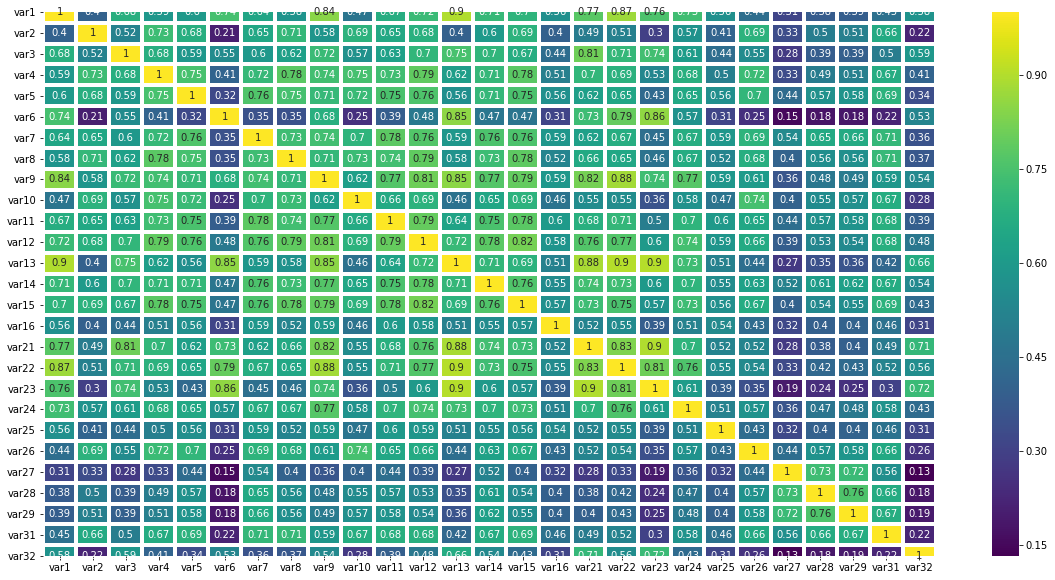

In [28]:
from matplotlib import pyplot
fig,ax=pyplot.subplots(figsize=(20,10))
train_corre=train_data.corr()
sns.heatmap(train_corre,annot=True,cmap="viridis",linewidth=3)

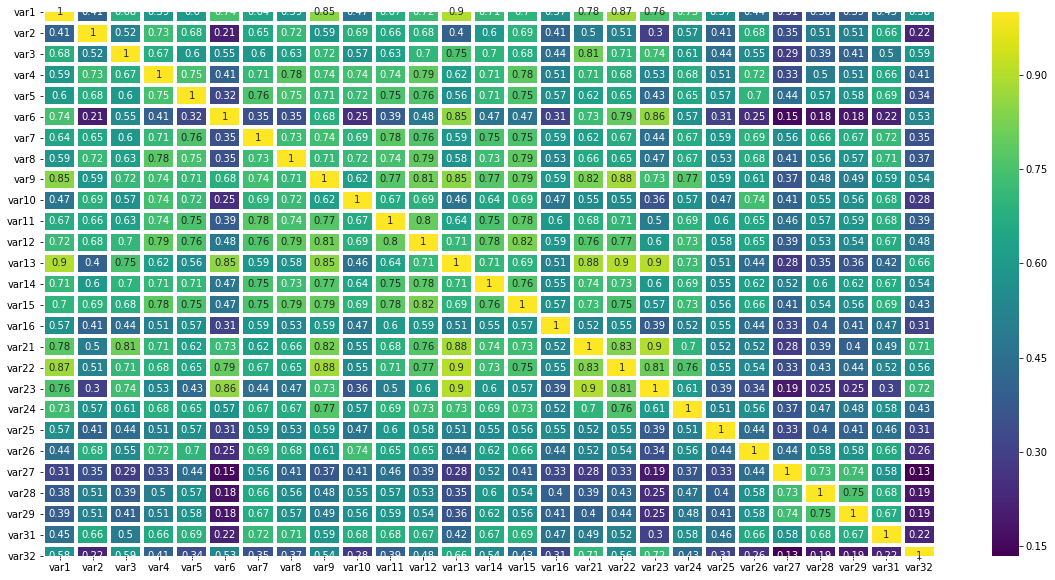

In [29]:
fig,ax=pyplot.subplots(figsize=(20,10))
test_corre=test_data.corr()
sns.heatmap(test_corre,annot=True,cmap="viridis",linewidth=3)

In [30]:
train_data.loc[:,"self_service_platform"].value_counts()

Desktop       184194
Mobile App     55595
Mobile Web     48063
STB            12148
Name: self_service_platform, dtype: int64

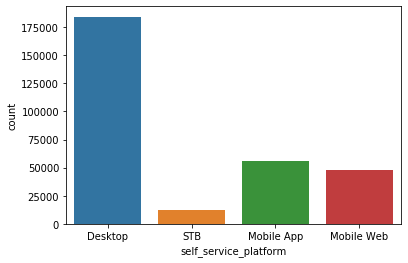

In [31]:
sns.countplot(data=train_data,x="self_service_platform")

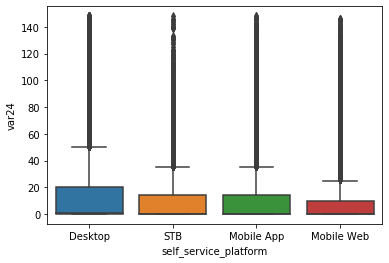

In [32]:
sns.boxplot(x="self_service_platform",y="var24",data=train_data)

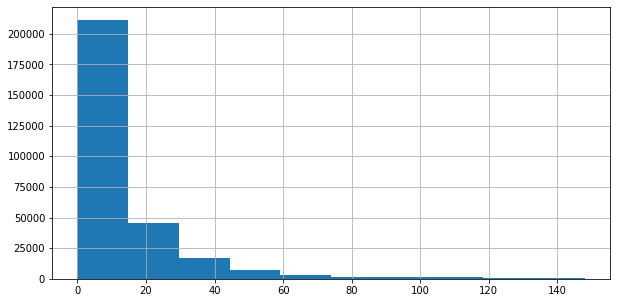

In [33]:
train_data.loc[:,"var24"].hist(figsize=(10,5))  # var24 contains around 10000 null values

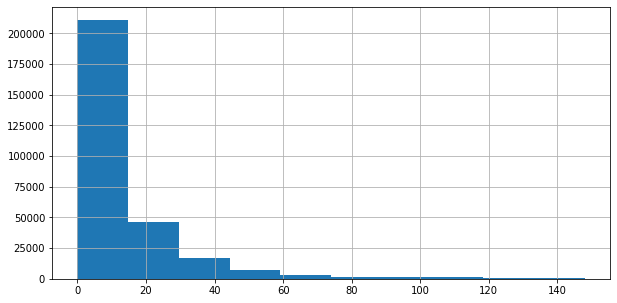

In [34]:
test_data.loc[:,"var24"].hist(figsize=(10,5))

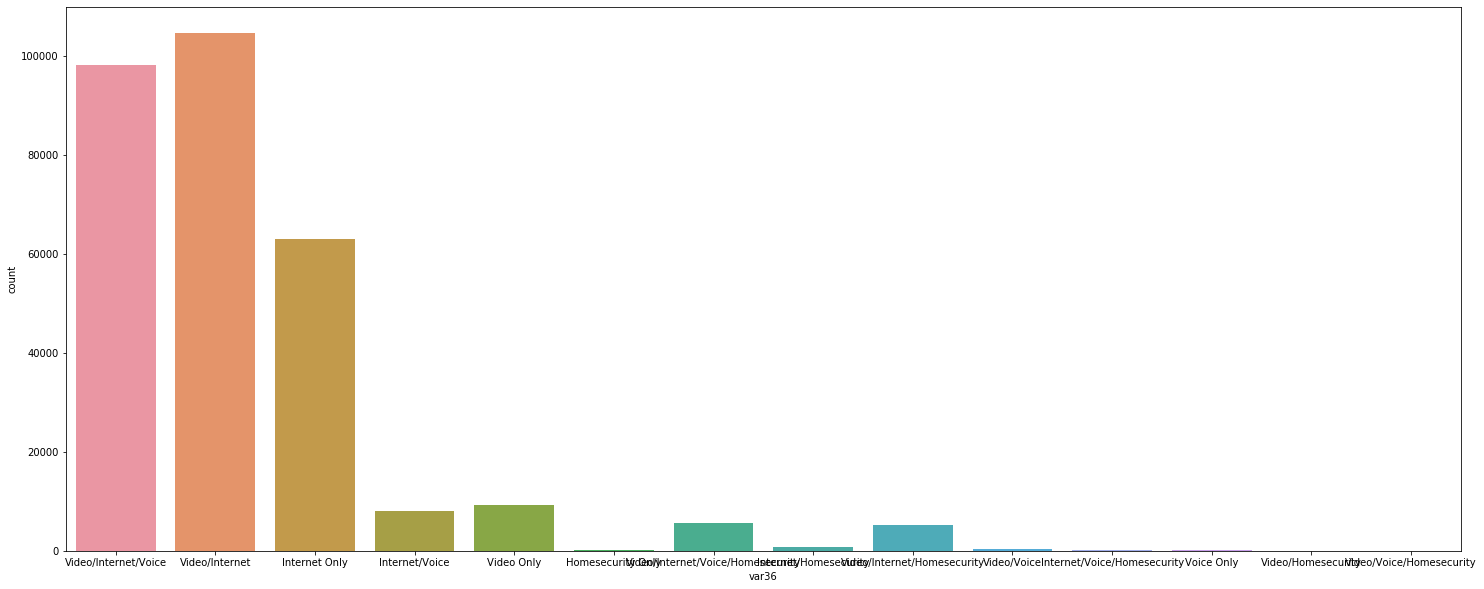

In [35]:
fig,ax=pyplot.subplots(figsize=(25,10))
sns.countplot("var36",data=train_data,linewidth=3)

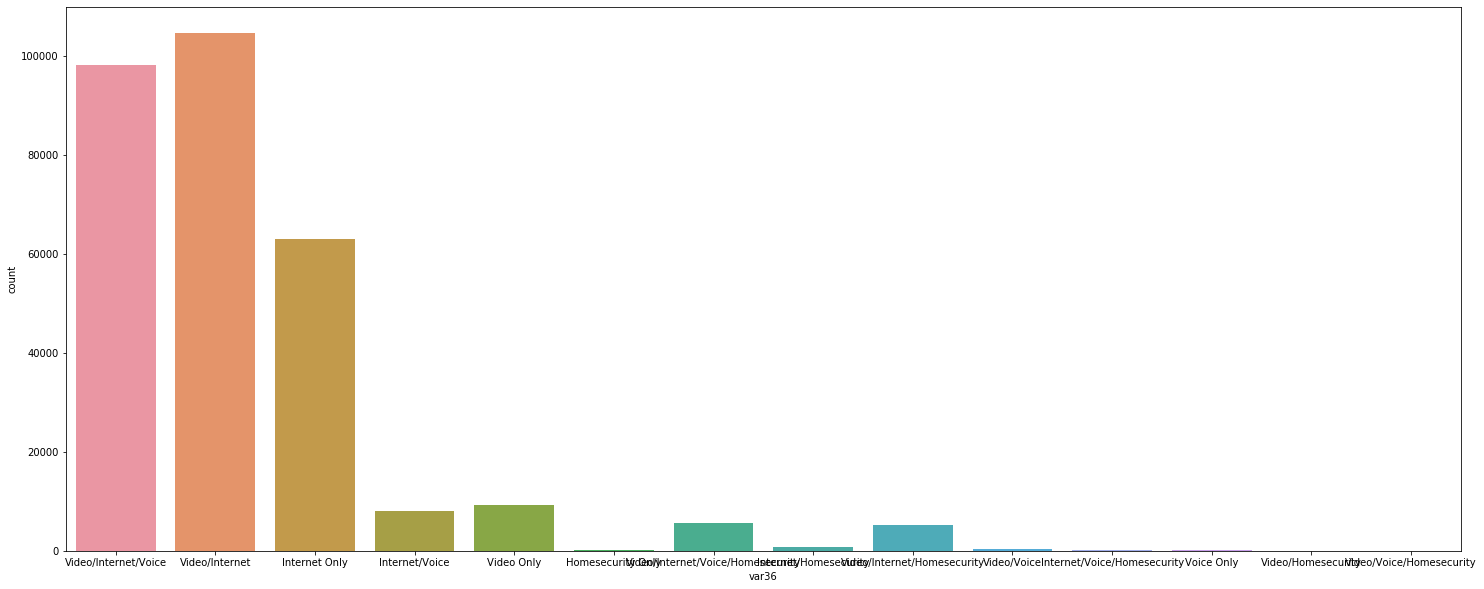

In [36]:
fig,ax=pyplot.subplots(figsize=(25,10))
sns.countplot("var36",data=train_data,linewidth=3)

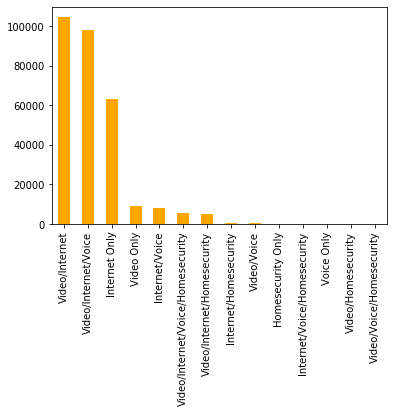

In [37]:
train_data.loc[:,"var36"].value_counts().plot.bar(color="orange")

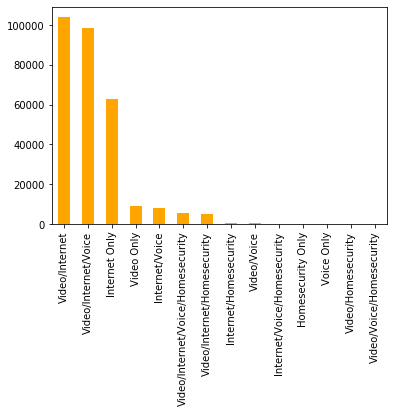

In [38]:
test_data.loc[:,"var36"].value_counts().plot.bar(color="orange")

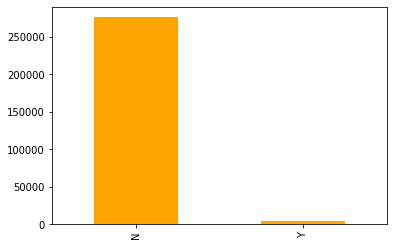

In [39]:
train_data.loc[:,"var37"].value_counts().plot.bar(color="orange")

In [40]:
train_data[train_data.loc[:,"var37"]=="Y"].shape[0]

4698

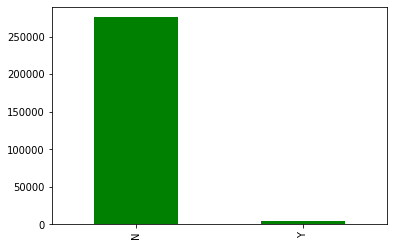

In [41]:
test_data.loc[:,"var37"].value_counts().plot.bar(color="green")

In [42]:
test_data[test_data.loc[:,"var37"]=="Y"].shape[0]

4788

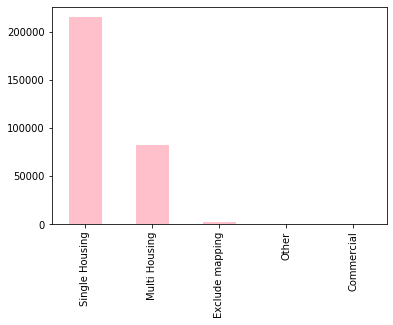

In [43]:
train_data.loc[:,"var39"].value_counts().plot.bar(color="pink")

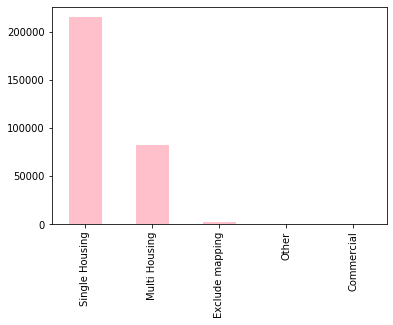

In [44]:
test_data.loc[:,"var39"].value_counts().plot.bar(color="pink")

In [45]:
from sklearn.preprocessing import Imputer

In [46]:

imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
train_data.iloc[:,19:20]=imputer.fit_transform(train_data.iloc[:,19:20])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [47]:
imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
test_data.iloc[:,19:20]=imputer.fit_transform(test_data.iloc[:,19:20])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
train_data.iloc[:,32:33].isnull().sum()

var39    22
dtype: int64

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
si=SimpleImputer(strategy="constant",fill_value="Single Housing")
train_data.iloc[:,32:33]=si.fit_transform(train_data.iloc[:,32:33])

In [51]:
si2=SimpleImputer(strategy="constant",fill_value="Single Housing")
test_data.iloc[:,32:33]=si2.fit_transform(test_data.iloc[:,32:33])

In [52]:
test_data.iloc[:,32:33]

,var39
cust_id,
400001,Single Housing
400002,Single Housing
400003,Single Housing
400004,Single Housing
400005,Single Housing
...,...
699996,Single Housing
699997,Single Housing
699998,Single Housing


In [53]:
train_data.loc[:,"var36"]

cust_id
100001    Video/Internet/Voice
100002          Video/Internet
100003    Video/Internet/Voice
100004           Internet Only
100005           Internet Only
                  ...         
399996           Internet Only
399997           Internet Only
399998           Internet Only
399999          Video/Internet
400000    Video/Internet/Voice
Name: var36, Length: 300000, dtype: object

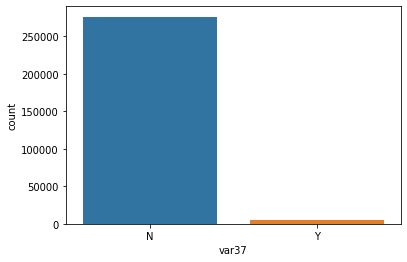

In [54]:
sns.countplot(x="var37",data=train_data)

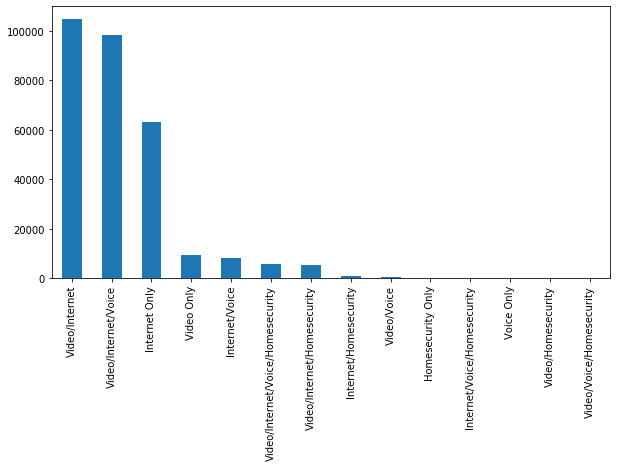

In [55]:
train_data.iloc[:,30].value_counts().plot.bar(figsize=(10,5))

In [56]:
#For var35
si1=SimpleImputer(strategy="constant",fill_value="Standard")
test_data.iloc[:,29:30]=si1.fit_transform(test_data.iloc[:,29:30])

In [57]:
train_data.iloc[:,29].value_counts()# it is highly imbalanced dataset

Standard               283150
CreditCard              10127
Electronic Transfer      6723
Name: var35, dtype: int64

In [58]:
train_data.iloc[:,27].value_counts()

other                     272972
news_channel1               8285
news_channel2               6062
entertainment_channel1      5563
entertainment_channel2      4904
movie_channel1              2214
Name: var33, dtype: int64

In [59]:
train_data.iloc[:,28].value_counts()

Never        105758
Pending      104447
Active        48580
Inactive      34526
Cancelled      6689
Name: var34, dtype: int64

In [60]:
train_data.iloc[:,32].value_counts()

Single Housing     214838
Multi Housing       82374
Exclude mapping      2209
Other                 310
Commercial            269
Name: var39, dtype: int64

In [61]:
train_data.iloc[:,33].value_counts()

N    170475
Y    129525
Name: var40, dtype: int64

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 100001 to 400000
Data columns (total 35 columns):
var1                     300000 non-null int64
var2                     300000 non-null int64
var3                     300000 non-null int64
var4                     300000 non-null int64
var5                     300000 non-null int64
var6                     300000 non-null int64
var7                     300000 non-null int64
var8                     300000 non-null int64
var9                     300000 non-null int64
var10                    300000 non-null int64
var11                    300000 non-null int64
var12                    300000 non-null int64
var13                    300000 non-null int64
var14                    300000 non-null int64
var15                    300000 non-null int64
var16                    300000 non-null int64
var21                    300000 non-null int64
var22                    300000 non-null int64
var23                    300000 non-nu

In [63]:
col_train_27=pd.get_dummies(train_data.iloc[:,27:28],drop_first=True)

col_test_27=pd.get_dummies(test_data.iloc[:,27:28],drop_first=True)
col_train_28=pd.get_dummies(train_data.iloc[:,28:29],drop_first=True)
col_test_28=pd.get_dummies(test_data.iloc[:,28:29],drop_first=True)
col_train_29=pd.get_dummies(train_data.iloc[:,29:30],drop_first=True)
col_test_29=pd.get_dummies(test_data.iloc[:,29:30],drop_first=True)
col_train_32=pd.get_dummies(train_data.iloc[:,32:33],drop_first=True)
col_train_33=pd.get_dummies(train_data.iloc[:,33:34],drop_first=True)
col_test_32=pd.get_dummies(test_data.iloc[:,32:33],drop_first=True)
col_test_33=pd.get_dummies(test_data.iloc[:,33:34],drop_first=True)

In [64]:
df=pd.concat([col_train_27,col_train_28,col_train_29,train_data],axis=1)

In [65]:
test_df=pd.concat([col_test_27,col_test_28,col_test_29,test_data],axis=1)

In [66]:
df=pd.concat([col_train_32,col_train_33,df],axis=1)

In [67]:
test_df=pd.concat([col_test_32,col_test_33,test_df],axis=1)

In [68]:
df

,var39_Exclude mapping,var39_Multi Housing,var39_Other,var39_Single Housing,var40_Y,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,...,var31,var32,var33,var34,var35,var36,var37,var39,var40,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,1,0,0,0,0,0,1,...,0,0,other,Inactive,Standard,Video/Internet/Voice,N,Single Housing,N,Desktop
100002,0,0,0,1,0,0,0,0,0,1,...,0,0,other,Never,Standard,Video/Internet,N,Single Housing,N,Desktop
100003,0,0,0,1,1,0,0,0,0,1,...,0,0,other,Inactive,Standard,Video/Internet/Voice,N,Single Housing,Y,Desktop
100004,0,0,0,1,0,0,0,0,0,1,...,0,1,other,Active,Standard,Internet Only,NaN,Single Housing,N,Desktop
100005,0,1,0,0,0,0,1,0,0,0,...,0,0,movie_channel1,Never,Standard,Internet Only,N,Multi Housing,N,STB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399996,0,1,0,0,1,0,0,0,0,1,...,0,0,other,Active,Standard,Internet Only,N,Multi Housing,Y,Desktop
399997,0,0,0,1,0,0,0,0,0,1,...,0,0,other,Pending,Standard,Internet Only,N,Single Housing,N,Mobile Web
399998,0,1,0,0,0,0,0,0,0,1,...,0,0,other,Pending,Standard,Internet Only,N,Multi Housing,N,Desktop


In [69]:
df.drop(["var33","var34","var35","var39","var40"],axis=1,inplace=True)

In [70]:
test_df.drop(["var33","var34","var35","var39","var40"],axis=1,inplace=True)

In [71]:
df.head()

,var39_Exclude mapping,var39_Multi Housing,var39_Other,var39_Single Housing,var40_Y,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,...,var25,var26,var27,var28,var29,var31,var32,var36,var37,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,1,0,0,0,0,0,1,...,0,4,153,0,0,0,0,Video/Internet/Voice,N,Desktop
100002,0,0,0,1,0,0,0,0,0,1,...,0,1,74,0,0,0,0,Video/Internet,N,Desktop
100003,0,0,0,1,1,0,0,0,0,1,...,0,5,133,0,0,0,0,Video/Internet/Voice,N,Desktop
100004,0,0,0,1,0,0,0,0,0,1,...,0,11,208,8,10,0,1,Internet Only,NaN,Desktop
100005,0,1,0,0,0,0,1,0,0,0,...,0,6,155,0,1,0,0,Internet Only,N,STB


In [72]:
df

,var39_Exclude mapping,var39_Multi Housing,var39_Other,var39_Single Housing,var40_Y,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,...,var25,var26,var27,var28,var29,var31,var32,var36,var37,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,1,0,0,0,0,0,1,...,0,4,153,0,0,0,0,Video/Internet/Voice,N,Desktop
100002,0,0,0,1,0,0,0,0,0,1,...,0,1,74,0,0,0,0,Video/Internet,N,Desktop
100003,0,0,0,1,1,0,0,0,0,1,...,0,5,133,0,0,0,0,Video/Internet/Voice,N,Desktop
100004,0,0,0,1,0,0,0,0,0,1,...,0,11,208,8,10,0,1,Internet Only,NaN,Desktop
100005,0,1,0,0,0,0,1,0,0,0,...,0,6,155,0,1,0,0,Internet Only,N,STB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399996,0,1,0,0,1,0,0,0,0,1,...,0,1,12,0,0,0,0,Internet Only,N,Desktop
399997,0,0,0,1,0,0,0,0,0,1,...,0,7,177,6,5,0,0,Internet Only,N,Mobile Web
399998,0,1,0,0,0,0,0,0,0,1,...,0,6,149,0,0,0,0,Internet Only,N,Desktop


In [73]:
from sklearn.preprocessing import LabelEncoder
lb_encode=LabelEncoder()
df.loc[:,"self_service_platform"]=lb_encode.fit_transform(df.loc[:,"self_service_platform"])

In [74]:
df

,var39_Exclude mapping,var39_Multi Housing,var39_Other,var39_Single Housing,var40_Y,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,...,var25,var26,var27,var28,var29,var31,var32,var36,var37,self_service_platform
cust_id,,,,,,,,,,,,,,,,,,,,,
100001,0,0,0,1,0,0,0,0,0,1,...,0,4,153,0,0,0,0,Video/Internet/Voice,N,0
100002,0,0,0,1,0,0,0,0,0,1,...,0,1,74,0,0,0,0,Video/Internet,N,0
100003,0,0,0,1,1,0,0,0,0,1,...,0,5,133,0,0,0,0,Video/Internet/Voice,N,0
100004,0,0,0,1,0,0,0,0,0,1,...,0,11,208,8,10,0,1,Internet Only,NaN,0
100005,0,1,0,0,0,0,1,0,0,0,...,0,6,155,0,1,0,0,Internet Only,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399996,0,1,0,0,1,0,0,0,0,1,...,0,1,12,0,0,0,0,Internet Only,N,0
399997,0,0,0,1,0,0,0,0,0,1,...,0,7,177,6,5,0,0,Internet Only,N,2
399998,0,1,0,0,0,0,0,0,0,1,...,0,6,149,0,0,0,0,Internet Only,N,0


In [75]:
test_df.head()

,var39_Exclude mapping,var39_Multi Housing,var39_Other,var39_Single Housing,var40_Y,var33_entertainment_channel2,var33_movie_channel1,var33_news_channel1,var33_news_channel2,var33_other,...,var24,var25,var26,var27,var28,var29,var31,var32,var36,var37
cust_id,,,,,,,,,,,,,,,,,,,,,
400001,0,0,0,1,0,0,0,0,0,1,...,0.0,0,3,121,0,0,0,0,Video/Internet/Voice,N
400002,0,0,0,1,0,0,0,0,0,1,...,0.0,0,1,61,0,0,0,0,Internet Only,N
400003,0,0,0,1,0,0,0,0,0,1,...,8.0,0,9,159,1,8,0,1,Video/Internet,N
400004,0,0,0,1,0,0,0,0,0,1,...,20.0,0,13,217,11,10,0,1,Internet Only,N
400005,0,0,0,1,0,0,0,0,0,1,...,0.0,0,1,27,0,0,0,0,Video/Internet,N


In [76]:
test_df.isnull().sum()

var39_Exclude mapping               0
var39_Multi Housing                 0
var39_Other                         0
var39_Single Housing                0
var40_Y                             0
var33_entertainment_channel2        0
var33_movie_channel1                0
var33_news_channel1                 0
var33_news_channel2                 0
var33_other                         0
var34_Cancelled                     0
var34_Inactive                      0
var34_Never                         0
var34_Pending                       0
var35_Electronic Transfer           0
var35_Standard                      0
var1                                0
var2                                0
var3                                0
var4                                0
var5                                0
var6                                0
var7                                0
var8                                0
var9                                0
var10                               0
var11       

# Predicting Values of var36

In [109]:
train36=df.drop(["var37"],inplace=False,axis=1)

In [110]:
train36.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 100001 to 400000
Data columns (total 45 columns):
var39_Exclude mapping           300000 non-null uint8
var39_Multi Housing             300000 non-null uint8
var39_Other                     300000 non-null uint8
var39_Single Housing            300000 non-null uint8
var40_Y                         300000 non-null uint8
var33_entertainment_channel2    300000 non-null uint8
var33_movie_channel1            300000 non-null uint8
var33_news_channel1             300000 non-null uint8
var33_news_channel2             300000 non-null uint8
var33_other                     300000 non-null uint8
var34_Cancelled                 300000 non-null uint8
var34_Inactive                  300000 non-null uint8
var34_Never                     300000 non-null uint8
var34_Pending                   300000 non-null uint8
var35_Electronic Transfer       300000 non-null uint8
var35_Standard                  300000 non-null uint8
var1                

In [111]:
train36.shape

(300000, 45)

In [112]:
train_36=train36.dropna(inplace=False)

In [113]:
train_36.shape

(295367, 45)

In [114]:
test_36=train36[train36["var36"].isnull()==True]

In [115]:
test_36.shape

(4633, 45)

In [116]:
X_test_36=test_36.drop("var36",inplace=False,axis=1).values

In [117]:
X_test_36.shape

(4633, 44)

In [118]:
X_train_36=train_36.drop("var36",inplace=False,axis=1).values
Y_train_36=train_36.loc[:,"var36"].values

In [119]:
X_train_36.shape

(295367, 44)

In [120]:
train_data.iloc[:,30:31]

,var36
cust_id,
100001,Video/Internet/Voice
100002,Video/Internet
100003,Video/Internet/Voice
100004,Internet Only
100005,Internet Only
...,...
399996,Internet Only
399997,Internet Only
399998,Internet Only


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfc=RandomForestClassifier(n_estimators=200)

In [123]:
rfc=rfc.fit(X_train_36,Y_train_36)
Y_test_36=rfc.predict(X_test_36)

In [124]:
Y_test_36=pd.DataFrame(Y_test_36)
X_test_36=pd.DataFrame(X_test_36)

In [125]:
af_test_36=pd.concat([X_test_36,Y_test_36],axis=1)

In [145]:
af_test_36.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 45 columns):
0     4633 non-null float64
1     4633 non-null float64
2     4633 non-null float64
3     4633 non-null float64
4     4633 non-null float64
5     4633 non-null float64
6     4633 non-null float64
7     4633 non-null float64
8     4633 non-null float64
9     4633 non-null float64
10    4633 non-null float64
11    4633 non-null float64
12    4633 non-null float64
13    4633 non-null float64
14    4633 non-null float64
15    4633 non-null float64
16    4633 non-null float64
17    4633 non-null float64
18    4633 non-null float64
19    4633 non-null float64
20    4633 non-null float64
21    4633 non-null float64
22    4633 non-null float64
23    4633 non-null float64
24    4633 non-null float64
25    4633 non-null float64
26    4633 non-null float64
27    4633 non-null float64
28    4633 non-null float64
29    4633 non-null float64
30    4633 non-null float64
31    4633 non-null float

In [126]:
af_test_36.shape

(4633, 45)

In [142]:
x=train36.copy()

In [143]:
x.loc[train36.loc[:,"var36"].isnull()==True,:]=af_test_36.copy()

In [144]:
x.shape

(300000, 45)

In [95]:
print(pagkal)

NameError: name 'pagkal' is not defined

In [ ]:
df

In [ ]:
train.iloc[:,30:31].isnull().sum()

In [ ]:
train361=train36.drop("var36",inplace=False,axis=1)

In [ ]:
train36.shape

# Predict VAr37

In [ ]:
train37=train.drop(["var36"],inplace=False,axis=1)

In [ ]:
train37.shape

In [ ]:
train37.iloc[:,33:34]

In [ ]:
train37.iloc[:,33:34]=label_encoder.fit_transform(train37.iloc[:,33:34])

In [ ]:
train_37=train37.dropna(inplace=False)

In [ ]:
X_test_37=train37.drop("var37",inplace=False,axis=1).values

In [ ]:
X_train_37=train_37.drop("var37",inplace=False,axis=1).values
Y_train_37=train_37.loc[:,"var37"].values

In [ ]:
X_train_37

In [ ]:
sv2=xgb.XGBClassifier()

In [ ]:
sv2=sv2.fit(X_train_37,Y_train_37)
train.iloc[:,31:32]=sv1.predict(X_test_37)

In [ ]:
train.iloc[:,31:32]

In [ ]:
train.isnull().sum()

In [ ]:
X_tes.isnull().sum()

# For test Data

In [ ]:
test.iloc[:,29:30]=label_encoder.fit_transform(test.iloc[:,29:30])

In [ ]:
test36=test.drop(["var37"],inplace=False,axis=1)
test_36=test36.dropna(inplace=False)
X_test_36_test=test36.drop("var36",inplace=False,axis=1).values
X_train_36_test=test_36.drop("var36",inplace=False,axis=1).values
Y_train_36_test=test_36.loc[:,"var36"].values

In [ ]:
test36.shape

In [ ]:
test36.iloc[:,30:33]

In [ ]:
import xgboost as xgb
sv3=xgb.XGBClassifier()
sv3=sv3.fit(X_train_36_test,Y_train_36_test)
test.iloc[:,30:31]=sv3.predict(X_test_36_test)
test.iloc[:,30:31].isnull().sum()

In [ ]:
X_train_36_test

In [ ]:
test.iloc[:,30:31]


# For test var37

In [ ]:
test37=test.drop(["var36"],inplace=False,axis=1)
test_37=test37.dropna(inplace=False)
X_test_37_test=test37.drop("var37",inplace=False,axis=1).values
X_train_37_test=test_37.drop("var37",inplace=False,axis=1).values
Y_train_37_test=test_37.loc[:,"var37"].values

In [ ]:
import xgboost as xgb
sv4=xgb.XGBClassifier()
sv4=sv4.fit(X_train_37_test,Y_train_37_test)
test.iloc[:,31:32]=sv4.predict(X_test_37_test)
test.iloc[:,31:32].isnull().sum()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
calsifier=RandomForestClassifier()
calsifier=calsifier.fit(X=X_train_37_test,y=Y_train_37_test)
r_predict=calsifier.predict(X_test_37_test)

In [ ]:
r_predict

In [ ]:
test.iloc[:,31:32]=label_encoder.fit_transform(test.iloc[:,31:32])

In [ ]:
test.iloc[:,30:31]=label_encoder.fit_transform(test.iloc[:,30:31])

In [ ]:
train.iloc[:,31:32]=label_encoder.fit_transform(train.iloc[:,31:32])

In [ ]:
train.iloc[:,30:31]=label_encoder.fit_transform(train.iloc[:,30:31])

In [ ]:
train.iloc[:,26:34]

# Obtaining Model using Xgboost

In [ ]:
X_train=train.drop("self_service_platform",inplace=False,axis=1).values
pd.DataFrame(X_train)

In [ ]:
pd.DataFrame(test)

In [ ]:
Y_train=train.loc[:,"self_service_platform"].values
pd.DataFrame(Y_train)

In [ ]:
test=pd.DataFrame(test).values
test

In [ ]:
import xgboost as xgb
xgb1=xgb.XGBClassifier(max_depth=12,scale_pos_weight=2,
                    objective='binary:logistic',
                    n_estimators=400,
                    learning_rate = 0.05)
xgb1=xgb1.fit(X_train,Y_train)
Y_predict=xgb1.predict(test)

In [ ]:
from sklearn.model_selection import cross_val_score
acc1=cross_val_score(estimator=xgb1,X=X_train,y=Y_train)

In [ ]:
acc1.mean()

In [ ]:
para_svm=[{'max_depth':[1,2,4,6,7,9,8,11,13,12,10,15,14,25,42],'scale_pos_weight':[0.1,0.001,1,1.2,1.4,1.8,2,3,4,5,6,7,89.5,11,20,50,70,100],'objective':["binary:logistic"],n_estimators=[100,300,500,1000,2000,5000,100000,15000],learning_rate=[0.001,0.01,0.05,0.1,0.15,0.2,0.5,0.9,1]}]
from sklearn.model_selection import GridSearchCV
grid_svm=GridSearchCV(estimator=xgb1,
                     param_grid=para_svm,
                     scoring="accuracy",
                     cv=10)
grid_svm=grid_svm.fit(X1,Y1)

In [ ]:
Y_predict=pd.DataFrame(Y_predict)

writer = pd.ExcelWriter('EXLSub.xlsx', engine='xlsxwriter')
Y_predict.to_excel(writer, index=False,sheet_name="sheet1")
workbook = writer.bookworksheet = writer.sheets['sheet1']

In [ ]:
Y_predict.to_excel('exlsun.xlsx', index=False)

In [ ]:
print(9)